In this lab work, we are going to start with planning the structure of our classes with the help of UML.

First, let's plan our work, making the diagram.

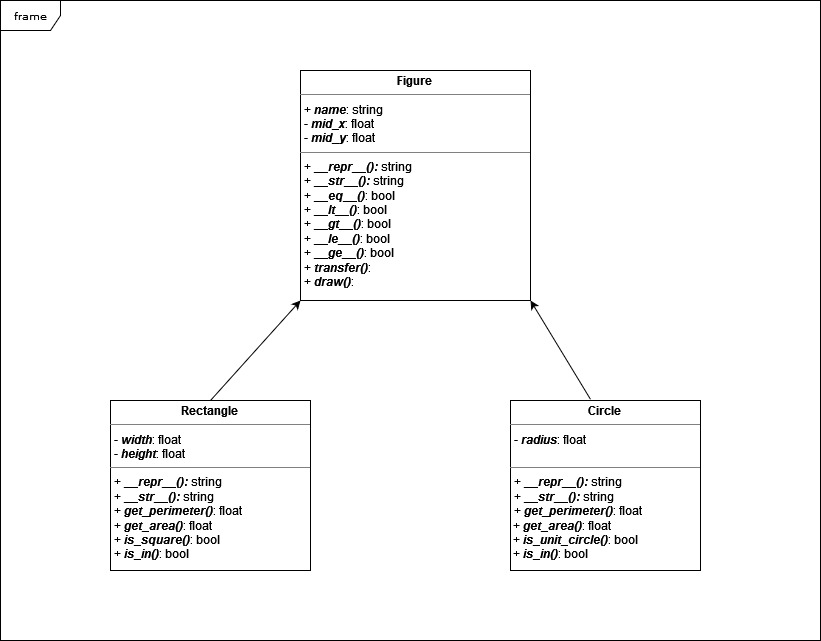

In [115]:
from IPython.display import Image
Image(filename="./Plan.jpg", height=100)

Then I am creating the classes, according to the plan.

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as patches
import time

import random


Creating exceptions for error handling:

In [ ]:
class NotImplementedError(Exception):
    def __init__(self, message="This method or property is not implemented in the subclass"):
        self.message = message

class PositiveNumberError(Exception):
    def __init__(self, message="Should be a positive number"):
        self.message = message
        
class DivisionByZeroError(Exception):
    def __init__(self, message="Division by zero is not allowed"):
        self.message = message

In [94]:
class Figure:
    def __init__(self, name, mid_x, mid_y):
        self.name = name
        self.mid_x = mid_x
        self.mid_y = mid_y

    @property
    def mid_x(self):
        return self._mid_x
    
    @mid_x.setter
    def mid_x(self, mid_x):
        if type (mid_x) != int or mid_x < 0:
            raise PositiveNumberError()
        else:
            self._mid_x = mid_x

    @property
    def mid_y(self):
        return self._mid_y
    
    @mid_y.setter
    def mid_y(self, mid_y):
        if type (mid_y) != int or mid_y < 0:
            raise PositiveNumberError()
        else:
            self._mid_y = mid_y

    @property
    def colors(self):
        return ['b', '#2A33D5', '#9871E0', '#835EA0', '#1775C8', '#017294', '#5305A8',
                'g', '#4DE44E', '#9AC972', '#5DE027', '#7AE0CB', '#63E928', '#0A8D35',
                'r', '#C996C3', '#FE3920', '#C94671', '#E72EA8', '#E50A2F', '#BB489F',
                'c', '#C0728C', '#7C5467', '#DE7B37', '#452A2E', '#C5A652', '#AE5837',
                'm', '#AA4495', '#743E62', '#7A356C', '#DD17F7', '#A56797', '#6E0EB0',
                'y', '#D6B907', '#F6E619', '#6856D6', '#D7FA22', '#F6B567', '#D1CF4E',
                'k', '#CCC4CF', '#D2BCD6', '#BFB1AB', '#31081E', '#3B2949', '#2D2E0E']
    
    def __str__(self):
        return f"{self.name} is a geometric figure"
    
    def __repr__(self):
        return f"A geometric figure, centre = {({self.mid_x}, {self.mid_y})}"
    
    def get_area(self):
        raise NotImplementedError()
    
    def get_perimeter(self):
        raise NotImplementedError()

    def __eq__ (self, other):
        print (f"{self.name} and {other.name} have {'' if self.get_area() == other.get_area() else 'not'} the same area") 
        return self.get_area() == other.get_area()
    
    def __lt__ (self, other):
         return self.get_area() < other.get_area()
    
    def __gt__ (self, other):
        return self.get_area() > other.get_area()
    
    def __le__ (self, other):
        return self.get_area() <= other.get_area()
    
    def __ge__ (self, other):
        return self.get_area() >= other.get_area()
    
    def _get_settings(self, field, facecolor, indentation):
        if field is None:
            f, ax = plt.subplots()
            f.set_size_inches(4,6)
            if facecolor is not None:
                f.set_facecolor(facecolor)
            else:
                f.set_facecolor(random.choice(self.colors))

            ax.grid()

            self._plot_axis(indentation)

        else:
            f, ax = field
            self._plot_axis(indentation)

        return f, ax
    
    @property
    def left_x(self):
        raise NotImplementedError()
    
    @property
    def right_x(self):
        raise NotImplementedError()
    
    @property
    def down_y(self):
        raise NotImplementedError()
    
    @property
    def up_y(self):
        raise NotImplementedError()
    
    def _find_left_lim(self, indentation):
        return (self.left_x - indentation) if self.left_x <= indentation else 0
    
    def _find_right_lim(self, indentation):
        return (self.right_x + indentation) if self.right_x >= indentation else 0
    
    def _find_up_lim (self, indentation):
        return (self.up_y + indentation) if self.up_y >= indentation else 0
    
    def _find_down_lim (self, indentation):
        return (self.down_y - indentation) if self.down_y <= indentation else 0
    
    def _plot_axis(self, indentation):
        x_abscissa = [self._find_left_lim(indentation), self._find_right_lim(indentation)]
        y_abscissa = [0, 0]
        x_ordinates = [0, 0]
        y_ordinates = [self._find_down_lim(indentation), self._find_up_lim(indentation)]

        return plt.plot(x_abscissa, y_abscissa, x_ordinates, y_ordinates, color = 'k', alpha = 0.1)
    
    def transfer(self, new_mid_x, new_mid_y):
        if not (isinstance(new_mid_x, (int, float)) and (isinstance(new_mid_y, (int, float)))): 
            raise TypeError(f"{new_mid_x =} and {new_mid_y=} should both be a number")
        old_mid_x = self.mid_x
        old_mid_y = self.mid_y
        old_edge_x = self.left_x
        old_edge_y = self.down_y
        self.mid_x = new_mid_x
        self.mid_y = new_mid_y
        return {"old_mid": (old_mid_x, old_mid_y),
                "old_edge": (old_edge_x, old_edge_y)}
    
    def _calculate_step(self, old_coordinate, new_coordinate, num_steps):
        if num_steps == 0:
            raise DivisionByZeroError()
        elif num_steps < 0:
            raise PositiveNumberError()
        elif not isinstance(num_steps, (int, float)) : 
            raise TypeError(f"{num_steps =} should be a number")
        return -(old_coordinate - new_coordinate) / num_steps
    
    def _calculate_coordinates(self, start_coordinate, step, num_steps):
         return [start_coordinate + x*step for x in range (num_steps)]

In [95]:
class Rectangle(Figure):
    # The rectangle's angles A, B, C, D have coordinates:
        # A (left_x, up_y)
        # B (right_x, up_y)
        # C (right_x, down_y)
        # D (left_x, down_y)
    
    def __init__(self, name, mid_x, mid_y, width, height):
        super().__init__(name, mid_x, mid_y)
        self.width = width
        self.height = height

    @property
    def width(self):
        return self._width
    
    @width.setter
    def width(self, width):
        if type (width) != int or width < 0:
            raise PositiveNumberError()
        else:
            self._width = width

    @property
    def height(self):
        return self._height
    
    @height.setter
    def height(self, height):
        if type (height) != int or height < 0:
            raise PositiveNumberError()
        else:
            self._height = height

    def __repr__(self):
        return f"A rectangle, centre = {({self.mid_x}, {self.mid_y})}, width = {self.width}, height = {self.height}"
    
    def __str__(self):
        return f"{self.name} is a rectangle."
    
    def get_perimeter (self):
        return 2*(self.width + self.height)
    
    def get_area (self):
        return self.width*self.height
    
    def is_square (self):
        return self.width == self.height
    
    @property
    def left_x(self):
        return self.mid_x - 0.5*self.width
    
    @property
    def right_x(self):
        return self.mid_x + 0.5*self.width
    
    @property
    def down_y(self):
        return self.mid_y - 0.5*self.height
    
    @property
    def up_y(self):
        return self.mid_y + 0.5*self.height
    
    def is_in (self, points_x, points_y):
        if not (isinstance(points_x, (int, float)) and isinstance(points_y, (int, float))):
            raise TypeError("points_x and points_y should be numeric values")
        if self.left_x < points_x < self.right_x and self.down_y < points_y < self.up_y:
           return True
        return False

    def draw(self, field=None, facecolor = None, lw=2, color = None, alpha = 0.75, indentation = 2): 
     
        f, ax = self._get_settings(field, facecolor, indentation)
            
        picture = patches.Rectangle ((self.left_x, self.down_y), self.width, self.height, lw = lw, 
                                     color = color if color is not None else random.choice(self.colors), alpha = alpha)
        
        
        ax.add_patch(picture)
        return f, ax
    
    def transfer_and_show(self, new_mid_x, new_mid_y, field = None, facecolor = 'm', indentation = 2, num_steps=4, lw=2, color='k'):
        if not (isinstance(new_mid_x, (int, float)) and (isinstance(new_mid_y, (int, float)))): 
            raise TypeError(f"{new_mid_x =} and {new_mid_y=} should both be a number")
        old_position = self.transfer(new_mid_x, new_mid_y) #{"old_mid": (old_mid_x, old_mid_y),
                                                            # "old_edge": (old_edge_x, old_edge_y)}

        plt.ion()
        f, ax = self._get_settings(field, facecolor, indentation)
        f.set_size_inches(6,6)
        step_x_rectangle = self._calculate_step(old_position["old_edge"][0], self.left_x, num_steps)
        step_y_rectangle = self._calculate_step(old_position["old_edge"][1], self.down_y, num_steps)
        x_edges = self._calculate_coordinates(old_position["old_edge"][0], step_x_rectangle, num_steps)
        y_edges = self._calculate_coordinates(old_position["old_edge"][1], step_y_rectangle, num_steps)
        for ind in range (num_steps):
            
            picture = patches.Rectangle ((x_edges[ind], y_edges[ind]), self.width, self.height, lw = lw, 
                                     color = color, alpha = 0.5)
            ax.add_patch(picture)
            self._plot_axis
            time.sleep(0.5)
        final_picture = patches.Rectangle ((self.left_x, self.down_y), self.width, self.height, lw = lw, 
                                     color = random.choice(self.colors), alpha = 0.8)
        ax.add_patch(final_picture)
        plt.ioff()
        plt.show()

Let's check whether the Rectangle's inner functions work as intended.

In [96]:
rectangles = [Rectangle ("ABCD", 5, 2, 5, 10), 
              Rectangle ("EFGH", 0, 0, 10, 20),
              Rectangle ("Any", -5, -5, 3, 9),
              Rectangle ("Square", -7, -7, 6, 6),
              Rectangle ("Eur", 25, 50, 8, 4),
              Rectangle ("Reur", -5, -5, 4, 8)]

any_shape = Figure ("Strange", -3, -3)

In [97]:
print (rectangles[1].__repr__())
print( rectangles[2].__str__())
print (f"{rectangles[0].get_perimeter() = }, {rectangles[0].get_area() = }")
print (f"{rectangles[3].is_square() = }, {rectangles[3].width = }, {rectangles[3].height = }") 
print (f"{rectangles[4].is_square() = }")
print (f"{rectangles[0] < rectangles [1] = }, {rectangles[0] < any_shape =}, \n{rectangles[4]<=rectangles[5] = }, {rectangles[4] == rectangles[5] =}")

A rectangle, centre = ({0}, {0}), width = 10, height = 20
Any is a rectangle.
rectangles[0].get_perimeter() = 30, rectangles[0].get_area() = 50
rectangles[3].is_square() = True, rectangles[3].width = 6, rectangles[3].height = 6
rectangles[4].is_square() = False
Eur and Reur have  the same area
rectangles[0] < rectangles [1] = True, rectangles[0] < any_shape =False, 
rectangles[4]<=rectangles[5] = True, rectangles[4] == rectangles[5] =True


Rectangle's functions are working correctly, so we continue with creating Circle class.

We will need the math module for pi number and to calculate the square roots.

In [98]:
from math import pi, sqrt

In [99]:
class Circle(Figure):
    def __init__(self, name, mid_x, mid_y, radius):
        super().__init__(name, mid_x, mid_y)
        self.radius = radius

    @property
    def radius(self):
        return self._radius
    
    @radius.setter
    def radius(self, radius):
        if type (radius) != int or radius < 0:
            raise PositiveNumberError()
        else:
            self._radius = radius

    def __repr__(self):
        return f"A circle, centre = {({self.mid_x}, {self.mid_y})}"
    
    def __str__(self):
        return f"{self.name} is a circle."
    
    def get_perimeter (self):
        return 2*pi*self.radius
    
    def get_area (self):
        return pi*(self.radius**2)
    
    def is_unit_circle (self):
        return self.radius == 1 and self.mid_x == 0 and self.mid_y == 0
    
    def is_in (self, points_x, points_y):
        return self.radius >= sqrt((points_x - self.mid_x)**2 + (points_y - self.mid_y)**2)
    
    @property
    def left_x(self):
        return self.mid_x - self.radius
    
    @property
    def right_x(self):
        return self.mid_x + self.radius
    
    @property
    def down_y(self):
        return self.mid_y - self.radius
    
    @property
    def up_y(self):
        return self.mid_y + self.radius
    
    def draw(self, field=None, facecolor = None, lw=2, color = None, alpha = 0.75, indentation = 2):

        f, ax = self._get_settings (field, facecolor, indentation)
        
        picture = patches.Circle ((self.mid_x, self.mid_y), self.radius, lw = lw, 
                                     color = color if color is not None else random.choice(self.colors), alpha = alpha)
        
        ax.add_patch(picture)
        return f, ax 

    def transfer_and_show(self, new_mid_x, new_mid_y, field = None, facecolor = 'm', indentation = 2, num_steps=4, lw=2, color='k'):
        if not (isinstance(new_mid_x, (int, float)) and (isinstance(new_mid_y, (int, float)))): 
            raise TypeError(f"{new_mid_x =} and {new_mid_y=} should both be a number")
        old_position = self.transfer(new_mid_x, new_mid_y) #{"old_mid": (old_mid_x, old_mid_y),
                                                            # "old_edge": (old_edge_x, old_edge_y)}

        plt.ion()
        f, ax = self._get_settings(field, facecolor, indentation)
        f.set_size_inches(6,6)
        step_x_circle = self._calculate_step(old_position["old_mid"][0], self.mid_x, num_steps)
        step_y_circle = self._calculate_step(old_position["old_mid"][1], self.mid_y, num_steps)
        x_centres = self._calculate_coordinates(old_position["old_mid"][0], step_x_circle, num_steps)
        y_centres = self._calculate_coordinates(old_position["old_mid"][1], step_y_circle, num_steps)
        for ind in range (num_steps):
            
            picture = patches.Circle ((x_centres[ind], y_centres[ind]), self.radius, lw = lw, 
                                     color = color, alpha = 0.5)
            ax.add_patch(picture)
            self._plot_axis
            time.sleep(0.5)
        final_picture = patches.Circle ((self.mid_x, self.mid_y), self.radius, lw = lw, 
                                     color = random.choice(self.colors), alpha = 0.8)
        ax.add_patch(final_picture)
        plt.ioff()
        plt.show()

Let's run some tests.

In [100]:
circle1 = Circle ("Unitcircle", 0, 0, 1)
circle2 = Circle ("O", 1, 1, 1)
rectangle1 = Rectangle ("Test", 0, 0, 1, 1)

In [101]:
print (rectangle1.is_in(0.1, 0.1))

True


In [102]:
print (f"{circle1 == circle2 =}")
print (f"{circle2 == rectangle1 =}")

Unitcircle and O have  the same area
circle1 == circle2 =True
O and Test have not the same area
circle2 == rectangle1 =False


In [103]:
print (f"{circle1.mid_x =}, {circle1.mid_y = }")

circle1.mid_x =0, circle1.mid_y = 0


In [104]:
print (circle1.is_in(0.5, 0.5))

True


In [105]:
circle1.transfer(5,5)
print (f"{circle1.mid_x =}, {circle1.mid_y = }")

circle1.mid_x =5, circle1.mid_y = 5


In [106]:
print (circle1.is_in(0.5, 0.5))

False


Let's try to draw the figures.

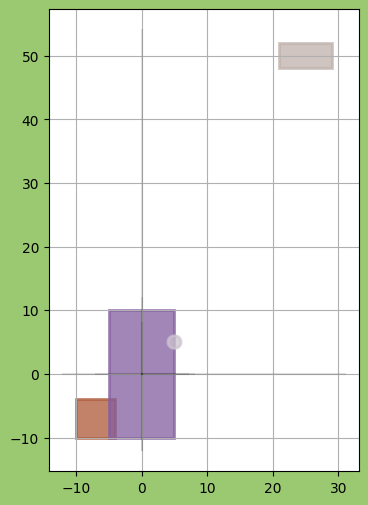

In [107]:
# rectangle1 = MyRectangle ("Test", 0, 0, 1, 1)
# circle1 = Circle ("Unitcircle", 0, 0, 1)
# rectangles = [Rectangle ("ABCD", 5, 2, 5, 10), 
#               Rectangle ("EFGH", 0, 0, 10, 20),
#               Rectangle ("Any", -5, -5, 3, 9),
#               Rectangle ("Square", -7, -7, 6, 6),
#               Rectangle ("Eur", 5, 5, 8, 4),
#               Rectangle ("Reur", -5, -5, 4, 8)]
pic1 = rectangles[3].draw()
pic2 = rectangles[4].draw(field = pic1)
pic3 = rectangles[1].draw(field= pic2)
pic4 = circle1.draw(field=pic3)


Let's check the rectangle's transfer with the function visualizing it.

In [108]:
rectangle1.__repr__()

'A rectangle, centre = ({0}, {0}), width = 1, height = 1'

(<Figure size 400x600 with 1 Axes>, <Axes: >)

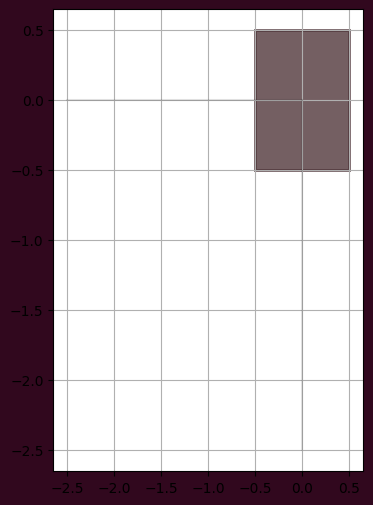

In [109]:
rectangle1.draw()

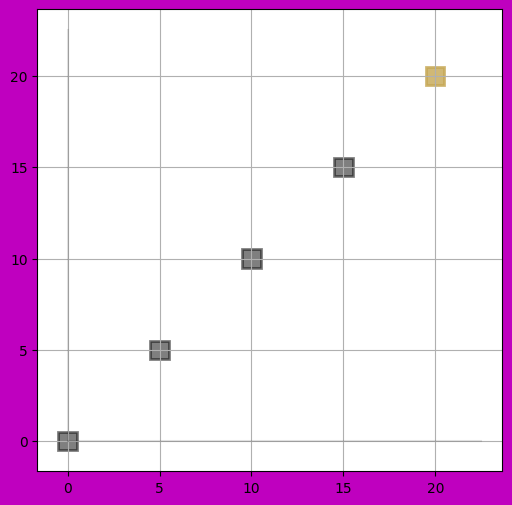

In [110]:
rectangle1.transfer_and_show(20,20)

In [111]:
rectangle1.__repr__()

'A rectangle, centre = ({20}, {20}), width = 1, height = 1'

Now let's check the circle's transfer.

In [112]:
circle1.__repr__()

'A circle, centre = ({5}, {5})'

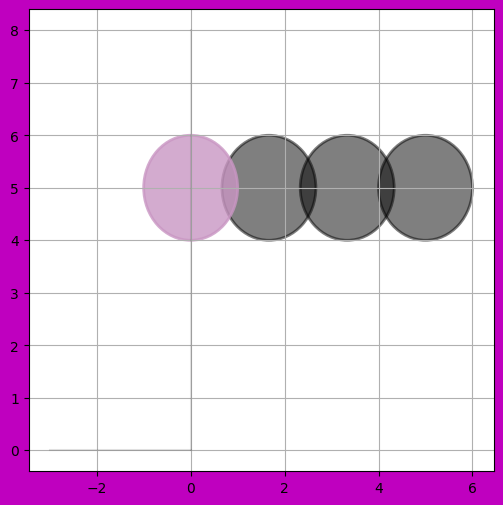

In [113]:
circle1.transfer_and_show(0, 5, num_steps = 3)